## Calculating guard cell maintenance value

Tan and Cheung (2020) included a maintenance value in their model:

> Cellular maintenance was modelled in similar way to previous studies (Cheung et al., 2014; Shameer et al., 2018; see Experimental Procedures for details). Given the lack of experimental information on guard cell maintenance costs, we varied the magnitude of cellular maintenance costs and selected a value of 2.87 mmol ATP g−1 DW h−1 as the ATP maintenance cost for the standard scenario based on matching carbon fixation during the Day phase contributing to 20% of osmolyte accumulation (see Experimental Procedures for details)

They set constraints to force sucrose to be accumulated:

> To simulate the choice of osmolytes corresponding to specific times of day, we set K+ storage to zero during the Day phase and sucrose storage to zero during the Open phase. These constraints forced K+ to be exported after the Open phase and for sucrose to be accumulated during the Day phase.


They then used the fact that sucrose was accumulated to set the maintenance to be 20% of total CO2 influx:

> With all constraints and objective functions of the standard scenario applied, except the magnitude of maintenance costs, a binary search algorithm was used to identify the magnitude of maintenance costs that gave a value of CO2 influx during the day phase that matched 20% of the total sucrose accumulation during the day phase (2.16 mmol CO2 g−1 DW as 20% of 0.9 mmol sucrose g−1 DW with sucrose having 12 carbons).

So their maintenance value was 2.87 mmol $\cdot$ ATP $\cdot$ gDW$^{−1}$ $\cdot$ h$^{−1}$, which we can use in our model. However, our model is in units of mmol $\cdot$ m$^{-2}$leaf $\cdot$ h$^{-1}$, so it needs to be converted.

## Converting mmol ⋅ gDW-1 to mmol ⋅ m-2

Tschoep et al (2009) found, and then Arnold 2014 referenced, that the dry weight content of Arabidopsis during optimal growth was 0.088:

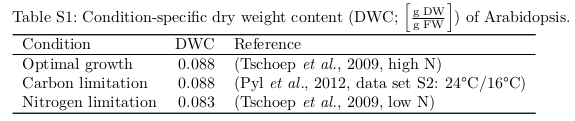

We assume that this relationship holds for guard cells as well.

We want to know the concentration of ATP, and as it will only dissolve in the water component of the leaf, not the dry, we need to first convert from mmol $\cdot$ gDW$^{−1}$ to mmol $\cdot$ gFW$^{−1}$. 

$$ 0.088 = \frac{gDW}{gFW} $$

We assume that the fresh weight of the leaf is the gDW + water:

$$ 0.088 = \frac{gDW}{gDW + gWater} $$

And using the density of water 1g=1cm3:

$$ 0.088 = \frac{gDW}{gDW + cm^3leaf} $$

$$ 0.088 \cdot (gDW + cm^3leaf) = gDW$$

$$ 0.088 \cdot gDW + 0.088 \cdot cm^3leaf = gDW$$

$$ 0.088 \cdot cm^3leaf = 0.912 \cdot gDW$$

$$ cm^3leaf = 10.36 \cdot gDW$$

So for every gram of dry weight we have 10.36 cm$^3$ of water that the ATP can be dissolved in, or 0.010 dm$^3$.

2.87 mmol $\cdot$ ATP $\cdot$ gDW$^{−1}$ $\cdot$ h$^{-1}$ $\times$ $\frac{1}{0.01}$ gDW $\cdot$ dm$^{-3}$ = 287 mmoles $\cdot$ dm$^{-3}$ $\cdot$ ATP $\cdot$ h$^{-1}$

This then needs to be converted to mmoles $\cdot$ ATP $\cdot$ m$^{-2}$leaf $\cdot$ h$^{-1}$ by multiplying by the volume of guard cells per m2leaf (this will vary depending on parameters chosen, but here is one example as a sanity check):

In [1]:
import pandas as pd

In [2]:
parameters_df = pd.read_csv("../inputs/arabidopsis_parameters.csv", index_col=0)
parameters_df

,Value,Units,Source
P_abs,9.000000e-01,Dimensionless,"Zhu, Long, and Ort (2010)"
T_l,1.700000e-04,m,Wuyts et al. (2010)
A_l,1.000000e+00,m$^2$,Fixed
V_gc_ind,4.750000e-13,dm$^3$,Jezek and Blatt (2017)
FqFm,9.000000e-01,Dimensionless,Lawson (2003)
R_ch,6.923077e-02,Dimensionless,"Fujiwara, Sanjaya, and Itoh (2019)"
L_air,3.700000e-01,Dimensionless,Earles et al. (2018)
L_epidermis,1.500000e-01,Dimensionless,Wuyts et al. (2010)
Vac_frac,7.510000e-01,Dimensionless,Wang et al. (2017)
T,2.961500e+02,K,Horrer et al. (2016)


So we multiply the volume of an individual guard cell by the number of guard cells per m2 of leaf to give us the volume of guard cells per m2 leaf

In [3]:
dm3_gc_per_m2leaf = parameters_df.loc["V_gc_ind", "Value"] * parameters_df.loc["N_gcs", "Value"]
dm3_gc_per_m2leaf

0.0002755

We then multiply this by 287, the number calculated above:

In [4]:
dm3_gc_per_m2leaf * 287

0.07906849999999999

So we need to add maintenance of 0.079 mmoles $\cdot$ ATP $\cdot$ m$^{-2}$leaf $\cdot$ h$^{-1}$ to the model. Currently during the opening phase of the model we have an ATP production rate from the mitochondrial ATP synthase of 0.003, so using this equation maintenance would be over 20X the amount of ATP production needed for guard cell opening, which seems unrealistic.

Maintenance in the mesophyll portion of the model is 5.17 mmoles $\cdot$ ATP $\cdot$ m$^{-2}$leaf $\cdot$ h$^{-1}$. Let's see what happens if we correct this to guard cell by size, as another possible way to do this:

The volume of 1m2 of leaf (in dm3):

In [5]:
volume_of_leaf_m2 = (parameters_df.loc["T_l", "Value"] * 1) * 1000
volume_of_leaf_m2

0.17

The proportion of the leaf that is air:

In [6]:
parameters_df.loc["L_air", "Value"]

0.37

The volume of leaf that is not air:

In [7]:
volume_of_leaf_not_air = volume_of_leaf_m2 * (1 - parameters_df.loc["L_air", "Value"])
volume_of_leaf_not_air

0.10710000000000001

The volume of the leaf that is not air and is not guard cells (ie. mesophyll):

In [8]:
volume_of_mesophyll = volume_of_leaf_not_air - dm3_gc_per_m2leaf
volume_of_mesophyll

0.10682450000000002

So the proportion of cells modelled that are guard cells:

In [9]:
proportion_of_leaf_gc = dm3_gc_per_m2leaf / volume_of_mesophyll
proportion_of_leaf_gc

0.002578996391277281

And if we multiply this by the maintenance in the mesophyll:

In [10]:
5.17 * proportion_of_leaf_gc

0.013333411342903542

Giving us 0.01 mmoles $\cdot$ ATP $\cdot$ m$^{-2}$leaf $\cdot$ h$^{-1}$, interestingly still approximately 3x the energy required for opening, and not too far from the values that Maurice used.